 <div width=100%>
    <img src="SARS-CoV-2_without_background.png" width="15%" align="right">
<h1> Tema projeto: "Panorama nacional do Coronavírus</h1>
</div>

- Base de dados: <a href="https://covid.saude.gov.br/">https://covid.saude.gov.br/</a>
- Exemplo de algumas informações apresentadas:
    - taxa de letalidade
    - casos e óbitos acumulados por região
    - casos e óbitos acumulados por UF
    - informações agrupadas por ano

# Importando as bibliotecas

In [417]:
import pandas as pd
import matplotlib.pyplot as plt
import pandera as pa

from pylab import *

from validate_data import validate_data_df

# Criando os dataframes

- Fonte dos dados: [Coronavírus Brasil](https://covid.saude.gov.br/) (atualizado em: 29/08/2021 17:40)

In [270]:
df_2020_pt1 = pd.read_csv("HIST_PAINEL_COVIDBR_2020_Parte1_29ago2021.csv", error_bad_lines=False, warn_bad_lines=False, sep=";")
df_2020_pt2 = pd.read_csv("HIST_PAINEL_COVIDBR_2020_Parte2_29ago2021.csv", error_bad_lines=False, warn_bad_lines=False, sep=";")
df_2021_pt1 = pd.read_csv("HIST_PAINEL_COVIDBR_2021_Parte1_29ago2021.csv", error_bad_lines=False, warn_bad_lines=False, sep=";")
df_2021_pt2 = pd.read_csv("HIST_PAINEL_COVIDBR_2021_Parte2_29ago2021.csv", error_bad_lines=False, warn_bad_lines=False, sep=";")

# Overview dos dataframes

## Verificando se são as mesmas colunas em todos os dataframes

In [271]:
print(f" df_2020_pt1 == df_2020_pt2: {set(df_2020_pt1.dtypes.index == df_2020_pt2.dtypes.index)}")
print(f" df_2020_pt1 == df_2021_p12: {set(df_2020_pt1.dtypes.index == df_2021_pt1.dtypes.index)}")
print(f" df_2020_pt1 == df_2021_pt2: {set(df_2020_pt1.dtypes.index == df_2021_pt2.dtypes.index)}")

 df_2020_pt1 == df_2020_pt2: {True}
 df_2020_pt1 == df_2021_p12: {True}
 df_2020_pt1 == df_2021_pt2: {True}


## Null values por coluna dos dataframes

In [272]:
df_aux = pd.DataFrame({"": [str(x) for x in df_2020_pt1.isnull().sum().index],
    "df_2020_pt1": [x for x in df_2020_pt1.isnull().sum()],
    "df_2020_pt2": [x for x in df_2020_pt2.isnull().sum()],
    "df_2021_pt1": [x for x in df_2021_pt1.isnull().sum()],
    "df_2021_pt2": [x for x in df_2021_pt2.isnull().sum()],
    })

df_aux.set_index("")

,df_2020_pt1,df_2020_pt2,df_2021_pt1,df_2021_pt2
,,,,
regiao,0,0,0,0
estado,158,153,181,60
municipio,7091,7497,8869,2940
coduf,0,0,0,0
codmun,4424,4284,5068,1680
codRegiaoSaude,7091,7497,8869,2940
nomeRegiaoSaude,7091,7497,8869,2940
data,0,0,0,0
semanaEpi,0,0,0,0


## Tipo de dados por dataframe

In [273]:
df_aux = pd.DataFrame({"": [str(x) for x in df_2020_pt1.dtypes.index],
    "df_2020_pt1": [x for x in df_2020_pt1.dtypes],
    "df_2020_pt2": [x for x in df_2020_pt2.dtypes],
    "df_2021_pt1": [x for x in df_2021_pt1.dtypes],
    "df_2021_pt2": [x for x in df_2021_pt2.dtypes],
    })
df_aux.set_index("")

,df_2020_pt1,df_2020_pt2,df_2021_pt1,df_2021_pt2
,,,,
regiao,object,object,object,object
estado,object,object,object,object
municipio,object,object,object,object
coduf,int64,int64,int64,int64
codmun,float64,float64,float64,float64
codRegiaoSaude,float64,float64,float64,float64
nomeRegiaoSaude,object,object,object,object
data,object,object,object,object
semanaEpi,int64,int64,int64,int64


## Precisamos tranformar a coluna "data" de objtect dtype -> datetime

In [274]:
df_2020_pt1 = validate_data_df(df_2020_pt1)
df_2020_pt2 = validate_data_df(df_2020_pt2)
df_2021_pt1 = validate_data_df(df_2021_pt1)
df_2021_pt2 = validate_data_df(df_2021_pt2)

Erro: expected series 'data' to have type datetime64[ns], got object
Formato de data ajustado
Erro: expected series 'data' to have type datetime64[ns], got object
Formato de data ajustado
Erro: expected series 'data' to have type datetime64[ns], got object
Formato de data ajustado
Erro: expected series 'data' to have type datetime64[ns], got object
Formato de data ajustado


## Range de datas por dataframe

In [275]:
def aux_rangeDay(name,df):
    aux=df.data
    print(f" {name}:\n   {aux.min().day}/{aux.min().month}/{aux.min().year} - {aux.max().day}/{aux.max().month}/{aux.max().year} -> {(aux.max()-aux.min()).days} dias")

aux_rangeDay('df_2020_pt1',df_2020_pt1)
aux_rangeDay('df_2020_pt2',df_2020_pt2)
aux_rangeDay('df_2021_pt1',df_2021_pt1)
aux_rangeDay('df_2021_pt2',df_2021_pt2)

 df_2020_pt1:
   25/2/2020 - 31/7/2020 -> 157 dias
 df_2020_pt2:
   1/8/2020 - 31/12/2020 -> 152 dias
 df_2021_pt1:
   1/1/2021 - 30/6/2021 -> 180 dias
 df_2021_pt2:
   1/7/2021 - 29/8/2021 -> 59 dias


## Total de nulos por dataframe

In [276]:
def aux_percRound(df):
    return round((df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100, 2)

df_aux = pd.DataFrame({"":['Shape','Nulos', 'Nulos %'],
    "df_2020_pt1": [(df_2020_pt1.shape) , df_2020_pt1.isnull().sum().sum(), aux_percRound(df_2020_pt1)],
    "df_2020_pt2": [(df_2020_pt2.shape), df_2020_pt2.isnull().sum().sum(), aux_percRound(df_2020_pt2)],
    "df_2021_pt1": [(df_2021_pt1.shape), df_2021_pt1.isnull().sum().sum(), aux_percRound(df_2021_pt1)],
    "df_2021_pt2": [(df_2021_pt2.shape), df_2021_pt2.isnull().sum().sum(), aux_percRound(df_2021_pt2)]
    })

df_aux.set_index("")

,df_2020_pt1,df_2020_pt2,df_2021_pt1,df_2021_pt2
,,,,
Shape,"(714481, 17)","(859707, 17)","(1017039, 17)","(337140, 17)"
Nulos,1464367,1756746,2078242,688920
Nulos %,12.06,12.02,12.02,12.02


## Concatenando os dataframes

In [277]:
df = pd.concat([df_2020_pt1,df_2020_pt2,df_2021_pt1,df_2021_pt2])
print(f"Datrafme shape: {df.shape}")
df.to_csv("HIST_PAINEL_COVIDBR_2020_2021.csv",index=False)

Datrafme shape: (2928367, 17)


# Analisando os dados
Dataframes concat

In [278]:
df = pd.read_csv("HIST_PAINEL_COVIDBR_2020_2021.csv")
print(f"Datrafme shape: {df.shape}")

Datrafme shape: (2928367, 17)


Validando se o dtype da coluna data está correto

In [279]:
validate_data_df(df)
df.head(5)

Erro: expected series 'data' to have type datetime64[ns], got object
Formato de data ajustado


,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0.0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1.0,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1.0,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1.0,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2.0,1,0,0,NaN,NaN,NaN


## Verificando quantidade de nulos por coluna

In [280]:
df_aux = pd.DataFrame({"": [str(x) for x in df.isnull().sum().index],
    "dtypes": [x for x in df.dtypes],
    "nulos": [x for x in df.isnull().sum()],
    "% nulos": [round((x/df.shape[0])*100,2) for x in df.isnull().sum()]
    
    })
df_aux.set_index("")

,dtypes,nulos,% nulos
,,,
regiao,object,0,0.00
estado,object,552,0.02
municipio,object,26397,0.90
coduf,int64,0,0.00
codmun,float64,15456,0.53
codRegiaoSaude,float64,26397,0.90
nomeRegiaoSaude,object,26397,0.90
data,datetime64[ns],0,0.00
semanaEpi,int64,0,0.00


Recuperadosnovos e emAcompanhamentoNovos possuem quase 100% de valores nulos, portanto essas colunas serão descartados

In [281]:
try:
    df.drop(columns=['Recuperadosnovos','emAcompanhamentoNovos'],inplace=True)
    print("Colunas removidas")
except:
    print("As colunas já foram removidas")

Colunas removidas


## Considerando que região não possui valores nulos, vamos olhar os registros

In [282]:
df.regiao.value_counts()

Nordeste        944331
Sudeste         873320
Sul             623730
Centro-Oeste    246557
Norte           239877
Brasil             552
Name: regiao, dtype: int64

## Código UF também não possui valores nulos

In [283]:
df.coduf.unique()

array([76, 11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       31, 32, 33, 35, 41, 42, 43, 50, 51, 52, 53], dtype=int64)

## Replace o código UF (coduf) pelo nome da Unidade Federativa

Fonte: [IBGE](https://www.ibge.gov.br/explica/codigos-dos-municipios.php)


In [284]:
dict_uf = {
	12: "Acre",
    27: "Alagoas",
    16: "Amapá",
    13: "Amazonas",
    29: "Bahia",
    23: "Ceará",
    53: "Distrito Federal",
    32: "Espírito Santo",
    52: "Goiás",
    21: "Maranhão",
    51: "Mato Grosso",
    50: "Mato Grosso do Sul",
    31: "Minas Gerais",
    15: "Pará",
    25: "Paraíba",
    41: "Paraná",
    26: "Pernambuco",
    22: "Piauí",
    24: "Rio Grande do Norte",
    43: "Rio Grande do Sul",
    33: "Rio de Janeiro",
    11: "Rôndonia",
    14: "Roraima",
    42: "Santa Catarina",
    35: "São Paulo",
    28: "Sergipe",
    17: "Tocantis",
    76: "Brasil",
}
df.coduf.replace(dict_uf, inplace=True)
df.coduf.unique()

array(['Brasil', 'Rôndonia', 'Acre', 'Amazonas', 'Roraima', 'Pará',
       'Amapá', 'Tocantis', 'Maranhão', 'Piauí', 'Ceará',
       'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas',
       'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo',
       'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina',
       'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás',
       'Distrito Federal'], dtype=object)

## 

# Gráficos

## Valores acumulados (2020-2021)
- Visualização dos casos e obitos acumulados desde 25/2/2020 até 29/8/2021

Text(0.5, 1.0, 'Taxa de letalidade - Brasil')

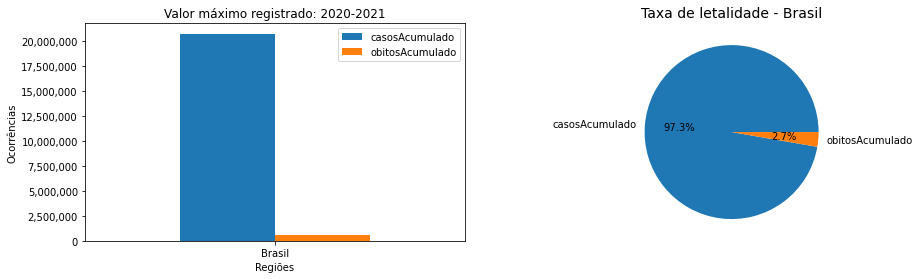

In [429]:
filtro_regiao = df.regiao == "Brasil"
filtro_data = df.data == df.data.max()

df_aux=df.loc[filtro_regiao & filtro_data, ['casosAcumulado','obitosAcumulado','regiao','coduf']]
df_aux=df_aux.groupby(df_aux.coduf)[['casosAcumulado','obitosAcumulado','regiao']].max()

plt.figure(1,figsize=(15,4))
plt.subplot(121)
df_aux.groupby(df_aux.regiao)[['casosAcumulado','obitosAcumulado']].sum().plot.bar(title="Valor máximo registrado: 2020-2021",ax=plt.gca())
plt.xlabel("Regiões")
plt.ylabel("Ocorrências")
plt.xticks(rotation='horizontal')
gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))


df_aux.drop(columns=['regiao'],inplace=True)
df_aux=df_aux.T
df_aux['ocorrencias']=['casosAcumulado','obitosAcumulado']

plt.subplot(122)
df_aux.groupby(df_aux.ocorrencias)[['Brasil']].max().plot.pie(subplots=True,ax=plt.gca(),autopct='%1.1f%%',legend=False,ylabel='')
plt.title("Taxa de letalidade - Brasil",fontsize=14)

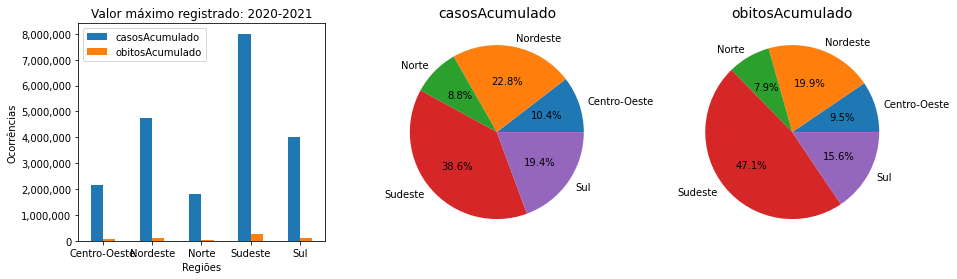

In [428]:
filtro_regiao = df.regiao != "Brasil"
filtro_data = df.data == df.data.max()

df_aux=df.loc[filtro_regiao & filtro_data, ['casosAcumulado','obitosAcumulado','regiao','coduf']]
df_aux=df_aux.groupby(df_aux.coduf)[['casosAcumulado','obitosAcumulado','regiao']].max()

plt.figure(1,figsize=(15,4))
plt.subplot(131)
df_aux.groupby(df_aux.regiao)[['casosAcumulado','obitosAcumulado']].sum().plot.bar(title="Valor máximo registrado: 2020-2021",ax=plt.gca())
plt.xlabel("Regiões")
plt.ylabel("Ocorrências")
plt.xticks(rotation='horizontal')
gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.subplot(132)
df_aux.groupby(df_aux.regiao)[['casosAcumulado']].sum().plot.pie(subplots=True,ax=plt.gca(),autopct='%1.1f%%',legend=False,ylabel='')
plt.title("casosAcumulado",fontsize=14)
plt.xlabel("")

plt.subplot(133)
df_aux.groupby(df_aux.regiao)[['obitosAcumulado']].sum().plot.pie(subplots=True,ax=plt.gca(),autopct='%1.1f%%',legend=False,ylabel='')
plt.title("obitosAcumulado",fontsize=14)


plt.show()

### Funções

In [430]:
#Função para descobrir qual foi o numero max de casosAcumulado de todas as regiões
def maxTodasRegioes(df):
    filtro_regiao = df.regiao != "Brasil"
    filtro_data = df.data == df.data.max()

    df_aux=df.loc[filtro_regiao & filtro_data, ['casosAcumulado','obitosAcumulado','regiao','coduf','data']]
    #Usamos max() e não sum(), pois existe uma ocorrência por UF com o valor somado das demais
    max_caso = df_aux.groupby(df_aux["regiao"])[["casosAcumulado"]].max().max()[0]
    max_obito = df_aux.groupby(df_aux["regiao"])[["obitosAcumulado"]].max().max()[0]

    return max_caso, max_obito

In [431]:
#Função para plotar os casos e óbitos acumulados por UF

def plot_UFporRegiao(nameRegiao,max_caso, max_obito):
    filtro_regiao = df.regiao != "Brasil"
    filtro_data = df.data == df.data.max()
    filtro_nameUF = df.regiao == nameRegiao

    df_aux=df.loc[filtro_regiao & filtro_data & filtro_nameUF, ['casosAcumulado','obitosAcumulado','coduf']]
    #Usamos max() e não sum(), pois existe uma ocorrência por UF com o valor somado das demais

    plt.figure(1,figsize=(15,10))

    plt.subplot(221)
    df_aux.groupby(df_aux["coduf"])[["casosAcumulado"]].max().plot.bar(title=f"{nameRegiao} (2020-2021)",ax=plt.gca())
    plt.xlabel("UF")
    plt.ylim((0,max_caso)) #fixar o limite do eixo y para poder comparar visualmente as proporçoes de ocorrências
    plt.ylabel("Ocorrências")
    gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

    plt.subplot(223)
    df_aux.groupby(df_aux["coduf"])[["obitosAcumulado"]].max().plot.bar(ax=plt.gca(), color="darkorange")
    plt.xlabel("UF")
    plt.ylim((0,max_obito)) #fixar o limite do eixo y para poder comparar visualmente as proporçoes de ocorrências
    plt.ylabel("Ocorrências")
    gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

    plt.subplot(222)
    df_aux.groupby(df_aux["coduf"])[["casosAcumulado"]].max().plot.pie(subplots=True,ax=plt.gca(),autopct='%1.1f%%',legend=False,ylabel='')
    plt.title("casosAcumulado",fontsize=14)

    plt.subplot(224)
    df_aux.groupby(df_aux["coduf"])[["obitosAcumulado"]].max().plot.pie(subplots=True,ax=plt.gca(),autopct='%1.1f%%',legend=False,ylabel='')
    plt.title("obitosAcumulado",fontsize=14)

    plt.show()

## A escala de casosAcumulado foi fixada para comparação visual com o valor máximo observado nos casos, o mesmo foi feito para obitosAcumulado

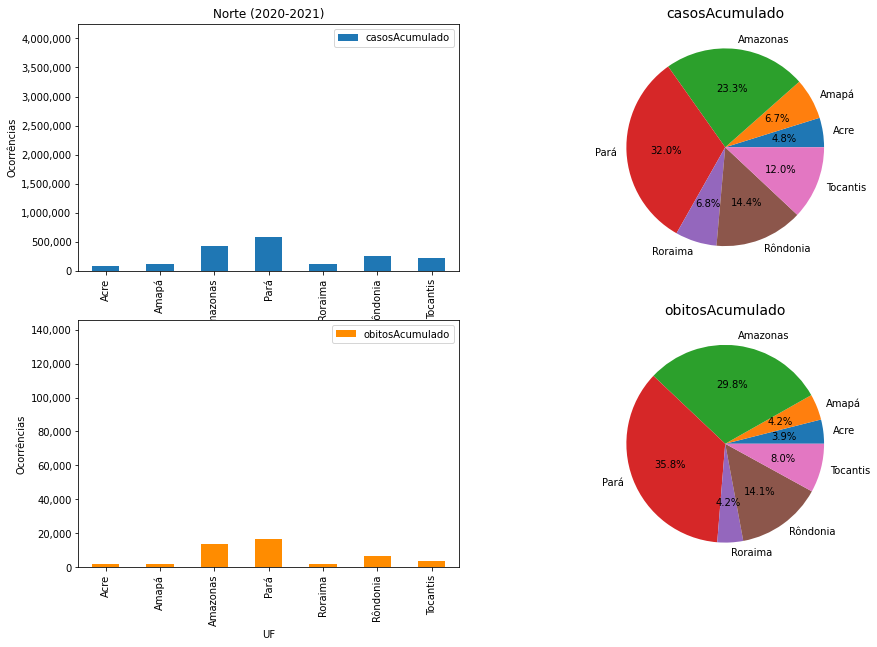

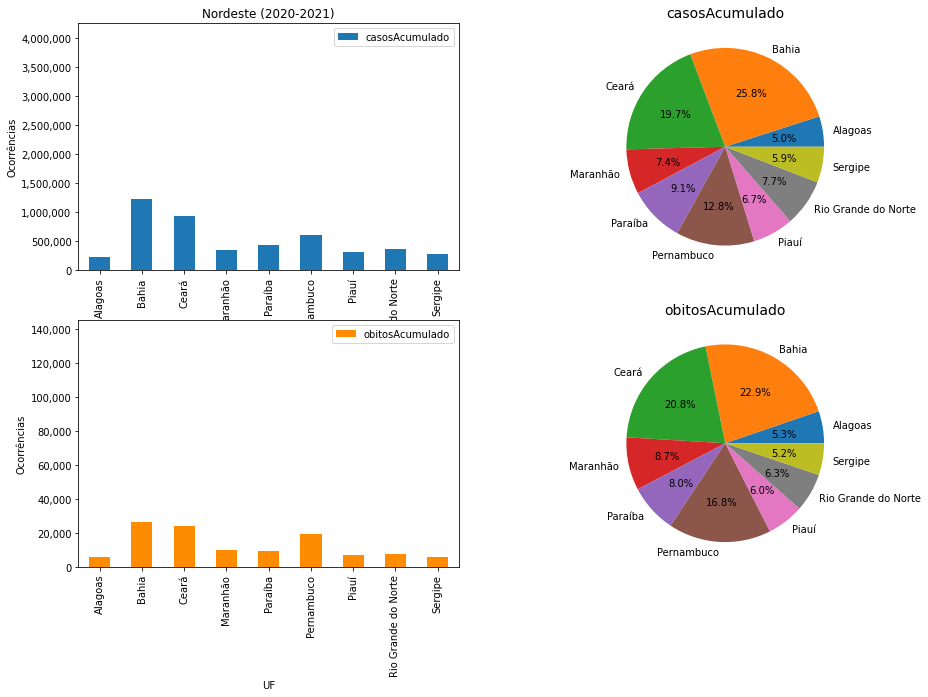

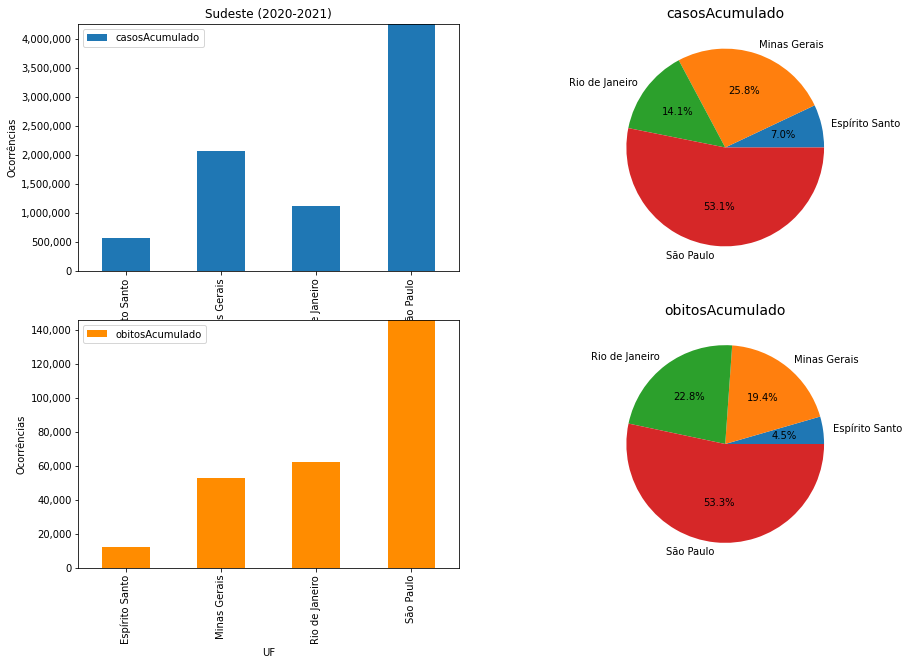

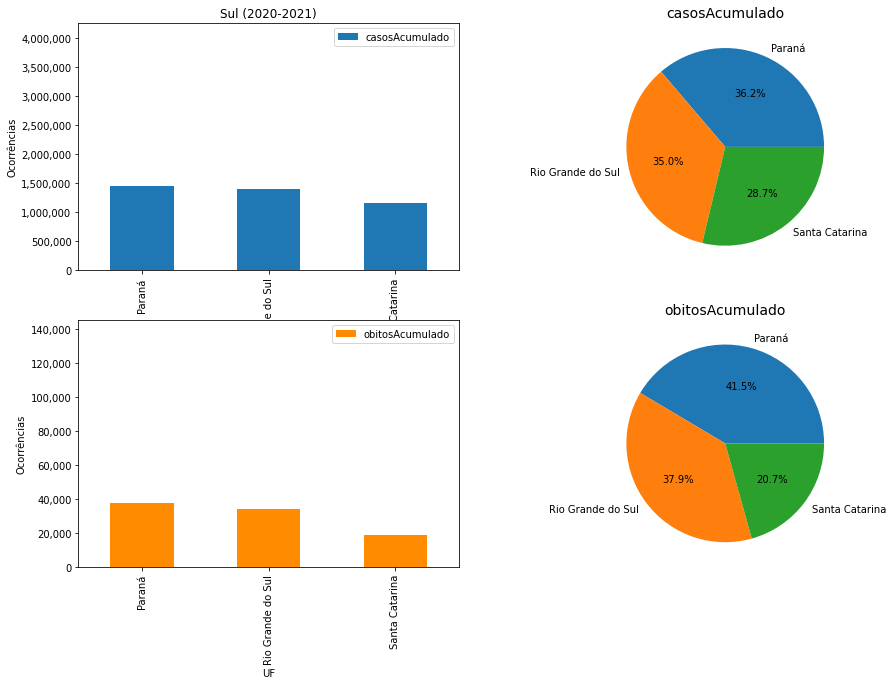

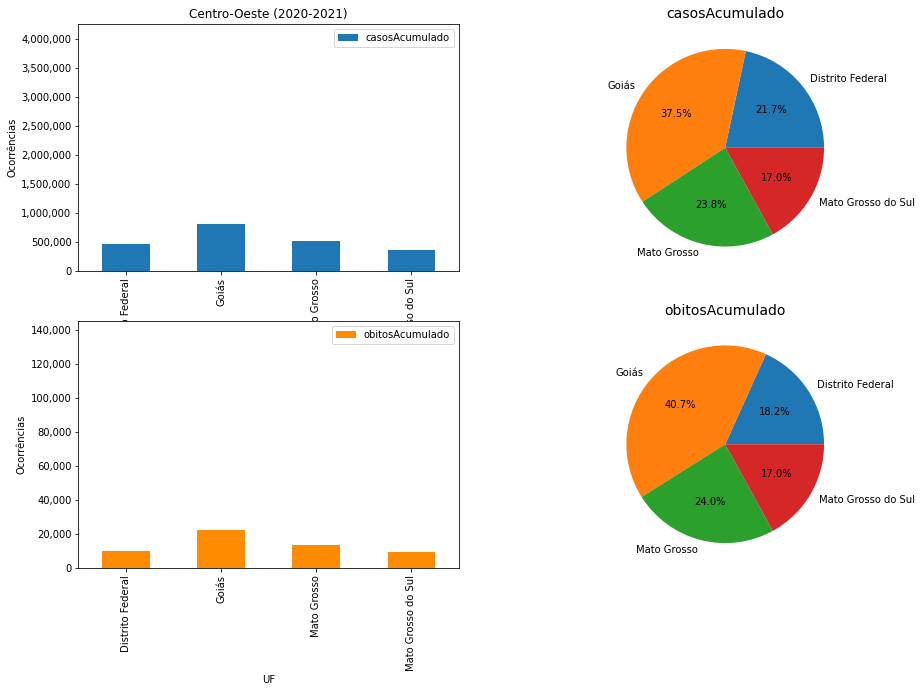

In [432]:
max_caso, max_obito = maxTodasRegioes(df)
for nomeRegiao in df.regiao.unique():
    if nomeRegiao != "Brasil":
        plot_UFporRegiao(nomeRegiao,max_caso, max_obito)

## Visualização por ano

Proporção de casos e obitos regitrados por ano

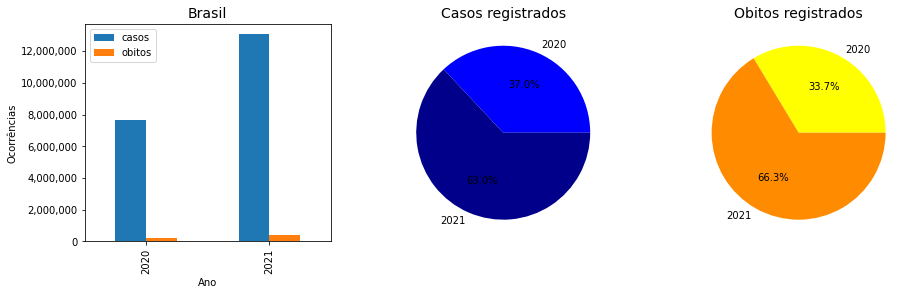

In [424]:
filtro_regiao = df.regiao == "Brasil"
df_aux=df.loc[filtro_regiao, ['casosAcumulado','obitosAcumulado','data','regiao','coduf']]
df_aux=df_aux.groupby(df_aux.data.dt.year)[['casosAcumulado','obitosAcumulado','regiao','data']].max()

df_aux.loc[2021,'casosAcumulado']= df_aux.loc[2021,'casosAcumulado'] - df_aux.loc[2020,'casosAcumulado']
df_aux.loc[2021,'obitosAcumulado']= df_aux.loc[2021,'obitosAcumulado'] - df_aux.loc[2020,'obitosAcumulado']

df_aux.rename(columns={'casosAcumulado': 'casos', 'obitosAcumulado':'obitos'},inplace=True)

#df_aux=df_aux.groupby(df_aux.data.dt.year)[['casos','obitos']].max()
#df_aux.plot(kind='pie', subplots=True, colors=['g', 'r'])

plt.figure(1,figsize=(15,4))
plt.subplot(131)
df_aux.groupby(df_aux.data.dt.year)[['casos','obitos']].max().plot.bar(ax=plt.gca())
plt.title("Brasil",fontsize=14)
plt.ylabel("Ocorrências")
plt.xlabel("Ano")
gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.subplot(132)
df_aux.groupby(df_aux.data.dt.year)[['casos']].max().plot.pie(subplots=True,colors=['blue', 'darkblue'],ax=plt.gca(),autopct='%1.1f%%',ylabel='',legend=False)
plt.title("Casos registrados",fontsize=14)

plt.subplot(133)
df_aux.groupby(df_aux.data.dt.year)[['obitos']].max().plot.pie(subplots=True,colors=['yellow', 'darkorange'],ax=plt.gca(),autopct='%1.1f%%',ylabel='',legend=False)
plt.title("Obitos registrados",fontsize=14)
plt.show()

Função para auxiliar separação dos dataframes por ano

In [628]:
def aux_df_year(df,ano):
    filtro_regiao = df.regiao == "Brasil"
    filtro_ano = df.data.dt.year == ano
    df_aux=df.loc[filtro_regiao & filtro_ano, ['casosNovos','obitosNovos','data','regiao']]
    df_aux=df_aux.groupby(df.data.dt.month)[['casosNovos','obitosNovos']].max()
    df_aux['ano']=ano
    df_aux=df_aux.reset_index()

    df_aux.rename(columns={'data':'mes'},inplace=True)

    return df_aux

Visualizar a quantidade de registros mensais por ano (casos e obitos)

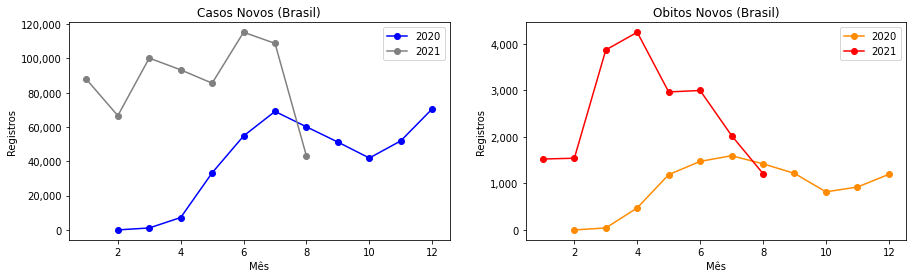

In [630]:
df_2020 = aux_df_year(df, 2020)
df_2021 = aux_df_year(df, 2021)

df_aux = pd.concat([df_2020,df_2021])
df_aux=df_aux.set_index('mes')

plt.figure(1,figsize=(15,4))
plt.subplot(121)
df_aux.groupby(df_aux.ano)['casosNovos'].plot.line(legend=True, marker='o', color={2020:"blue",2021:"grey"},ax=plt.gca())
gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Casos Novos (Brasil)")
plt.ylabel("Registros")
plt.xlabel("Mês")

plt.subplot(122)
df_aux.groupby(df_aux.ano)['obitosNovos'].plot.line(legend=True, marker='o', color={2020:"darkorange",2021:"red"},ax=plt.gca())
gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Obitos Novos (Brasil)")
plt.ylabel("Registros")
plt.xlabel("Mês")
plt.show()

Boxplot da quantidade de registros mensais por ano (casos e obitos)

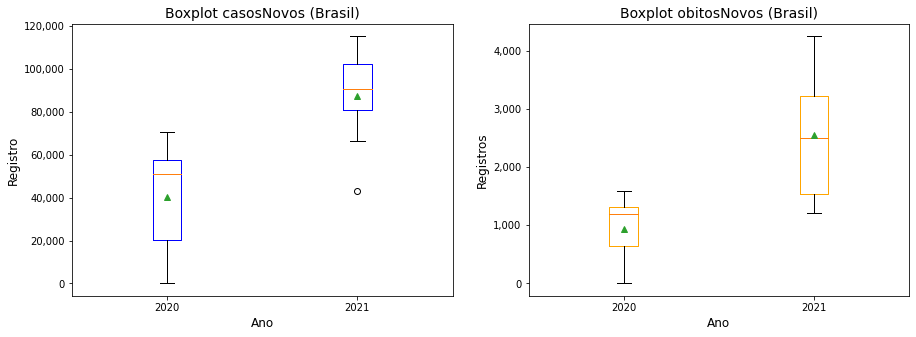

In [631]:
df_2020 = aux_df_year(df, 2020)
df_2020.drop(columns=['mes','ano'],inplace=True)

df_2021 = aux_df_year(df, 2021)
df_2021.drop(columns=['mes','ano'],inplace=True)

listaCasos=[df_2020['casosNovos'].values,df_2021['casosNovos'].values]
listaObitos=[df_2020['obitosNovos'].values,df_2021['obitosNovos'].values]

fig= plt.figure(figsize=(15,5))#figsize=(10,5)
ax = fig.add_subplot(121)
plt.boxplot(listaCasos, meanline=False,showmeans=True, boxprops=dict(color='blue'))
ax.set_xticklabels(['2020','2021'])
plt.title("Boxplot casosNovos (Brasil)",fontsize=14)
plt.ylabel('Registro',fontsize=12)
plt.xlabel('Ano',fontsize=12)
gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax = fig.add_subplot(122)
plt.boxplot(listaObitos, meanline=False,showmeans=True, boxprops=dict(color='orange'))
ax.set_xticklabels(['2020','2021'])
plt.title("Boxplot obitosNovos (Brasil)",fontsize=14)
plt.ylabel('Registros',fontsize=12)
plt.xlabel('Ano',fontsize=12)
gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()